In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP

import torch
import numpy as np

# import utils
import json
from datetime import date

Running on Colab?

Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = 'configs'
else:
    config_dir = os.path.join(BASE_DIR,'configs')



## Simple aggregation using the mean

In [4]:
with open(os.path.join(config_dir,'multivar_polynomial_compare_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [5]:
default_conf['cnp_params']['aggregation_kwargs']['simple_aggregator_type'] = 'mean'

In [6]:
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=130, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
None


In [7]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
                         

  0%|          | 22/100000 [00:00<17:00, 97.94it/s]

Mean training loss at epoch 0 :                         240715.219
Mean Validation loss after 0 equals                     195388.969

Validation loss for the function plotted:                 195388.969


  1%|          | 1014/100000 [00:08<14:35, 113.04it/s]

Mean training loss at epoch 1000 :                         6.662
Mean Validation loss after 1000 equals                     12.986

Validation loss for the function plotted:                 12.986


  2%|▏         | 2022/100000 [00:17<14:38, 111.52it/s]

Mean training loss at epoch 2000 :                         6.722
Mean Validation loss after 2000 equals                     7.375

Validation loss for the function plotted:                 7.375


  3%|▎         | 3015/100000 [00:26<14:26, 111.89it/s]

Mean training loss at epoch 3000 :                         7.005
Mean Validation loss after 3000 equals                     6.625

Validation loss for the function plotted:                 6.625


  4%|▍         | 4021/100000 [00:36<14:52, 107.57it/s]

Mean training loss at epoch 4000 :                         7.184
Mean Validation loss after 4000 equals                     7.878

Validation loss for the function plotted:                 7.878


  5%|▌         | 5018/100000 [00:45<15:29, 102.15it/s]

Mean training loss at epoch 5000 :                         6.789
Mean Validation loss after 5000 equals                     7.025

Validation loss for the function plotted:                 7.025


  6%|▌         | 6022/100000 [00:54<14:10, 110.52it/s]

Mean training loss at epoch 6000 :                         7.407
Mean Validation loss after 6000 equals                     7.117

Validation loss for the function plotted:                 7.117


  7%|▋         | 7022/100000 [01:03<14:02, 110.40it/s]

Mean training loss at epoch 7000 :                         6.506
Mean Validation loss after 7000 equals                     13.03

Validation loss for the function plotted:                 13.03


  8%|▊         | 8021/100000 [01:12<13:51, 110.57it/s]

Mean training loss at epoch 8000 :                         7.282
Mean Validation loss after 8000 equals                     8.675

Validation loss for the function plotted:                 8.675


  9%|▉         | 9023/100000 [01:21<13:37, 111.32it/s]

Mean training loss at epoch 9000 :                         6.734
Mean Validation loss after 9000 equals                     8.674

Validation loss for the function plotted:                 8.674


 10%|█         | 10013/100000 [01:30<13:13, 113.38it/s]

Mean training loss at epoch 10000 :                         7.259
Mean Validation loss after 10000 equals                     8.297

Validation loss for the function plotted:                 8.297


 11%|█         | 11023/100000 [01:39<13:28, 110.06it/s]

Mean training loss at epoch 11000 :                         6.677
Mean Validation loss after 11000 equals                     8.259

Validation loss for the function plotted:                 8.259


 12%|█▏        | 12023/100000 [01:48<13:00, 112.71it/s]

Mean training loss at epoch 12000 :                         6.797
Mean Validation loss after 12000 equals                     7.335

Validation loss for the function plotted:                 7.335


 13%|█▎        | 13015/100000 [01:57<12:41, 114.27it/s]

Mean training loss at epoch 13000 :                         7.423
Mean Validation loss after 13000 equals                     7.419

Validation loss for the function plotted:                 7.419


 14%|█▍        | 14020/100000 [02:06<14:22, 99.67it/s] 

Mean training loss at epoch 14000 :                         7.384
Mean Validation loss after 14000 equals                     7.159

Validation loss for the function plotted:                 7.159


 15%|█▌        | 15012/100000 [02:16<13:17, 106.56it/s]

Mean training loss at epoch 15000 :                         6.495
Mean Validation loss after 15000 equals                     9.621

Validation loss for the function plotted:                 9.621


 16%|█▌        | 16020/100000 [02:26<13:05, 106.97it/s]

Mean training loss at epoch 16000 :                         6.873
Mean Validation loss after 16000 equals                     7.222

Validation loss for the function plotted:                 7.222


 17%|█▋        | 17016/100000 [02:36<13:54, 99.47it/s] 

Mean training loss at epoch 17000 :                         6.451
Mean Validation loss after 17000 equals                     7.599

Validation loss for the function plotted:                 7.599


 18%|█▊        | 18011/100000 [02:46<14:10, 96.43it/s] 

Mean training loss at epoch 18000 :                         6.737
Mean Validation loss after 18000 equals                     7.682

Validation loss for the function plotted:                 7.682


 19%|█▉        | 19020/100000 [02:56<13:41, 98.53it/s] 

Mean training loss at epoch 19000 :                         6.839
Mean Validation loss after 19000 equals                     7.483

Validation loss for the function plotted:                 7.483


 20%|██        | 20013/100000 [03:05<11:45, 113.46it/s]

Mean training loss at epoch 20000 :                         6.675
Mean Validation loss after 20000 equals                     7.9

Validation loss for the function plotted:                 7.9


 21%|██        | 21017/100000 [03:14<11:57, 110.12it/s]

Mean training loss at epoch 21000 :                         6.878
Mean Validation loss after 21000 equals                     7.244

Validation loss for the function plotted:                 7.244


 22%|██▏       | 22015/100000 [03:23<11:00, 118.03it/s]

Mean training loss at epoch 22000 :                         6.49
Mean Validation loss after 22000 equals                     7.442

Validation loss for the function plotted:                 7.442


 23%|██▎       | 23008/100000 [03:34<26:04, 49.21it/s] 

Mean training loss at epoch 23000 :                         7.446
Mean Validation loss after 23000 equals                     7.529

Validation loss for the function plotted:                 7.529


 24%|██▍       | 24019/100000 [03:48<11:29, 110.15it/s]

Mean training loss at epoch 24000 :                         7.083
Mean Validation loss after 24000 equals                     7.808

Validation loss for the function plotted:                 7.808


 25%|██▌       | 25013/100000 [03:57<12:03, 103.66it/s]

Mean training loss at epoch 25000 :                         6.954
Mean Validation loss after 25000 equals                     7.198

Validation loss for the function plotted:                 7.198


 26%|██▌       | 26011/100000 [04:08<12:14, 100.75it/s]

Mean training loss at epoch 26000 :                         6.936
Mean Validation loss after 26000 equals                     9.469

Validation loss for the function plotted:                 9.469


 27%|██▋       | 27018/100000 [04:22<21:11, 57.42it/s] 

Mean training loss at epoch 27000 :                         6.517
Mean Validation loss after 27000 equals                     7.854

Validation loss for the function plotted:                 7.854


 28%|██▊       | 28013/100000 [04:33<13:51, 86.59it/s] 

Mean training loss at epoch 28000 :                         7.228
Mean Validation loss after 28000 equals                     7.754

Validation loss for the function plotted:                 7.754


 29%|██▉       | 29011/100000 [04:45<14:59, 78.90it/s] 

Mean training loss at epoch 29000 :                         5.44
Mean Validation loss after 29000 equals                     6.636

Validation loss for the function plotted:                 6.636


 30%|███       | 30016/100000 [04:55<13:28, 86.55it/s] 

Mean training loss at epoch 30000 :                         4.96
Mean Validation loss after 30000 equals                     5.335

Validation loss for the function plotted:                 5.335


 31%|███       | 31014/100000 [05:07<10:58, 104.71it/s]

Mean training loss at epoch 31000 :                         4.497
Mean Validation loss after 31000 equals                     5.024

Validation loss for the function plotted:                 5.024


 32%|███▏      | 32015/100000 [05:16<10:36, 106.89it/s]

Mean training loss at epoch 32000 :                         4.826
Mean Validation loss after 32000 equals                     5.316

Validation loss for the function plotted:                 5.316


 33%|███▎      | 33016/100000 [05:26<10:44, 103.88it/s]

Mean training loss at epoch 33000 :                         4.251
Mean Validation loss after 33000 equals                     5.328

Validation loss for the function plotted:                 5.328


 34%|███▍      | 34019/100000 [05:35<10:30, 104.70it/s]

Mean training loss at epoch 34000 :                         4.137
Mean Validation loss after 34000 equals                     4.886

Validation loss for the function plotted:                 4.886


 35%|███▌      | 35014/100000 [05:45<10:05, 107.36it/s]

Mean training loss at epoch 35000 :                         4.742
Mean Validation loss after 35000 equals                     4.739

Validation loss for the function plotted:                 4.739


 36%|███▌      | 36021/100000 [05:57<10:56, 97.52it/s] 

Mean training loss at epoch 36000 :                         4.079
Mean Validation loss after 36000 equals                     4.936

Validation loss for the function plotted:                 4.936


 37%|███▋      | 37009/100000 [06:12<15:35, 67.32it/s]  

Mean training loss at epoch 37000 :                         4.639
Mean Validation loss after 37000 equals                     4.392

Validation loss for the function plotted:                 4.392


 38%|███▊      | 38014/100000 [06:24<14:54, 69.32it/s] 

Mean training loss at epoch 38000 :                         4.273
Mean Validation loss after 38000 equals                     4.645

Validation loss for the function plotted:                 4.645


 39%|███▉      | 39011/100000 [06:34<09:23, 108.27it/s]

Mean training loss at epoch 39000 :                         3.826
Mean Validation loss after 39000 equals                     5.783

Validation loss for the function plotted:                 5.783


 40%|████      | 40010/100000 [06:44<09:56, 100.54it/s]

Mean training loss at epoch 40000 :                         3.804
Mean Validation loss after 40000 equals                     4.988

Validation loss for the function plotted:                 4.988


 41%|████      | 41014/100000 [06:54<09:27, 103.98it/s]

Mean training loss at epoch 41000 :                         3.834
Mean Validation loss after 41000 equals                     4.306

Validation loss for the function plotted:                 4.306


 42%|████▏     | 42021/100000 [07:03<08:53, 108.62it/s]

Mean training loss at epoch 42000 :                         4.187
Mean Validation loss after 42000 equals                     4.23

Validation loss for the function plotted:                 4.23


 43%|████▎     | 43017/100000 [07:12<08:47, 108.00it/s]

Mean training loss at epoch 43000 :                         3.862
Mean Validation loss after 43000 equals                     4.598

Validation loss for the function plotted:                 4.598


 44%|████▍     | 44021/100000 [07:22<09:24, 99.25it/s] 

Mean training loss at epoch 44000 :                         3.846
Mean Validation loss after 44000 equals                     5.34

Validation loss for the function plotted:                 5.34


 45%|████▌     | 45014/100000 [07:33<10:08, 90.36it/s] 

Mean training loss at epoch 45000 :                         4.085
Mean Validation loss after 45000 equals                     4.326

Validation loss for the function plotted:                 4.326


 46%|████▌     | 46016/100000 [07:42<08:42, 103.24it/s]

Mean training loss at epoch 46000 :                         3.922
Mean Validation loss after 46000 equals                     4.498

Validation loss for the function plotted:                 4.498


 47%|████▋     | 47012/100000 [07:54<09:09, 96.34it/s] 

Mean training loss at epoch 47000 :                         4.185
Mean Validation loss after 47000 equals                     4.606

Validation loss for the function plotted:                 4.606


 48%|████▊     | 48022/100000 [08:04<07:54, 109.45it/s]

Mean training loss at epoch 48000 :                         4.514
Mean Validation loss after 48000 equals                     3.877

Validation loss for the function plotted:                 3.877


 49%|████▉     | 49020/100000 [08:13<08:08, 104.40it/s]

Mean training loss at epoch 49000 :                         4.203
Mean Validation loss after 49000 equals                     4.708

Validation loss for the function plotted:                 4.708


 50%|█████     | 50013/100000 [08:22<08:06, 102.81it/s]

Mean training loss at epoch 50000 :                         3.927
Mean Validation loss after 50000 equals                     4.299

Validation loss for the function plotted:                 4.299


 51%|█████     | 51021/100000 [08:32<07:54, 103.13it/s]

Mean training loss at epoch 51000 :                         3.835
Mean Validation loss after 51000 equals                     4.222

Validation loss for the function plotted:                 4.222


 52%|█████▏    | 52011/100000 [08:44<09:02, 88.48it/s] 

Mean training loss at epoch 52000 :                         3.83
Mean Validation loss after 52000 equals                     5.006

Validation loss for the function plotted:                 5.006


 53%|█████▎    | 53014/100000 [08:57<08:34, 91.27it/s]

Mean training loss at epoch 53000 :                         3.918
Mean Validation loss after 53000 equals                     4.838

Validation loss for the function plotted:                 4.838


 54%|█████▍    | 54022/100000 [09:08<07:37, 100.39it/s]

Mean training loss at epoch 54000 :                         3.913
Mean Validation loss after 54000 equals                     4.699

Validation loss for the function plotted:                 4.699


 55%|█████▌    | 55016/100000 [09:18<07:28, 100.34it/s]

Mean training loss at epoch 55000 :                         4.458
Mean Validation loss after 55000 equals                     4.379

Validation loss for the function plotted:                 4.379


 56%|█████▌    | 56018/100000 [09:29<07:21, 99.55it/s] 

Mean training loss at epoch 56000 :                         3.782
Mean Validation loss after 56000 equals                     5.206

Validation loss for the function plotted:                 5.206


 57%|█████▋    | 57021/100000 [09:39<07:01, 102.02it/s]

Mean training loss at epoch 57000 :                         3.68
Mean Validation loss after 57000 equals                     4.142

Validation loss for the function plotted:                 4.142


 58%|█████▊    | 58019/100000 [09:49<07:07, 98.12it/s] 

Mean training loss at epoch 58000 :                         4.618
Mean Validation loss after 58000 equals                     4.451

Validation loss for the function plotted:                 4.451


 59%|█████▉    | 59019/100000 [10:00<07:15, 94.13it/s] 

Mean training loss at epoch 59000 :                         3.576
Mean Validation loss after 59000 equals                     4.047

Validation loss for the function plotted:                 4.047


 60%|██████    | 60019/100000 [10:10<06:48, 97.85it/s] 

Mean training loss at epoch 60000 :                         3.999
Mean Validation loss after 60000 equals                     4.151

Validation loss for the function plotted:                 4.151


 61%|██████    | 61019/100000 [10:20<06:54, 94.04it/s] 

Mean training loss at epoch 61000 :                         3.999
Mean Validation loss after 61000 equals                     5.297

Validation loss for the function plotted:                 5.297


 62%|██████▏   | 62019/100000 [10:30<06:22, 99.36it/s] 

Mean training loss at epoch 62000 :                         3.261
Mean Validation loss after 62000 equals                     4.373

Validation loss for the function plotted:                 4.373


 63%|██████▎   | 63019/100000 [10:41<06:40, 92.45it/s] 

Mean training loss at epoch 63000 :                         3.343
Mean Validation loss after 63000 equals                     5.292

Validation loss for the function plotted:                 5.292


 64%|██████▍   | 64017/100000 [10:51<06:24, 93.53it/s]

Mean training loss at epoch 64000 :                         3.426
Mean Validation loss after 64000 equals                     4.434

Validation loss for the function plotted:                 4.434


 65%|██████▌   | 65012/100000 [11:02<05:58, 97.69it/s]

Mean training loss at epoch 65000 :                         4.32
Mean Validation loss after 65000 equals                     4.209

Validation loss for the function plotted:                 4.209


 66%|██████▌   | 66013/100000 [11:12<05:53, 96.12it/s] 

Mean training loss at epoch 66000 :                         3.937
Mean Validation loss after 66000 equals                     5.926

Validation loss for the function plotted:                 5.926


 67%|██████▋   | 67015/100000 [11:22<05:39, 97.05it/s] 

Mean training loss at epoch 67000 :                         3.484
Mean Validation loss after 67000 equals                     4.892

Validation loss for the function plotted:                 4.892


 68%|██████▊   | 68020/100000 [11:33<05:20, 99.91it/s] 

Mean training loss at epoch 68000 :                         3.782
Mean Validation loss after 68000 equals                     4.753

Validation loss for the function plotted:                 4.753


 69%|██████▉   | 69021/100000 [11:43<05:02, 102.28it/s]

Mean training loss at epoch 69000 :                         3.776
Mean Validation loss after 69000 equals                     4.781

Validation loss for the function plotted:                 4.781


 70%|███████   | 70018/100000 [11:53<06:03, 82.51it/s] 

Mean training loss at epoch 70000 :                         3.792
Mean Validation loss after 70000 equals                     4.511

Validation loss for the function plotted:                 4.511


 71%|███████   | 71011/100000 [12:05<04:47, 100.67it/s]

Mean training loss at epoch 71000 :                         3.682
Mean Validation loss after 71000 equals                     5.264

Validation loss for the function plotted:                 5.264


 72%|███████▏  | 72013/100000 [12:15<05:03, 92.25it/s] 

Mean training loss at epoch 72000 :                         3.656
Mean Validation loss after 72000 equals                     4.959

Validation loss for the function plotted:                 4.959


 73%|███████▎  | 73011/100000 [12:25<04:30, 99.72it/s] 

Mean training loss at epoch 73000 :                         3.796
Mean Validation loss after 73000 equals                     4.481

Validation loss for the function plotted:                 4.481


 74%|███████▍  | 74020/100000 [12:35<04:30, 95.92it/s] 

Mean training loss at epoch 74000 :                         4.306
Mean Validation loss after 74000 equals                     4.055

Validation loss for the function plotted:                 4.055


 75%|███████▌  | 75013/100000 [12:46<04:19, 96.35it/s] 

Mean training loss at epoch 75000 :                         3.71
Mean Validation loss after 75000 equals                     4.194

Validation loss for the function plotted:                 4.194


 76%|███████▌  | 76018/100000 [12:56<04:01, 99.17it/s] 

Mean training loss at epoch 76000 :                         3.938
Mean Validation loss after 76000 equals                     4.832

Validation loss for the function plotted:                 4.832


 77%|███████▋  | 77019/100000 [13:06<03:47, 100.99it/s]

Mean training loss at epoch 77000 :                         3.726
Mean Validation loss after 77000 equals                     4.355

Validation loss for the function plotted:                 4.355


 78%|███████▊  | 78013/100000 [13:18<05:57, 61.53it/s] 

Mean training loss at epoch 78000 :                         3.615
Mean Validation loss after 78000 equals                     4.234

Validation loss for the function plotted:                 4.234


 79%|███████▉  | 79014/100000 [13:30<04:18, 81.16it/s]

Mean training loss at epoch 79000 :                         3.695
Mean Validation loss after 79000 equals                     5.09

Validation loss for the function plotted:                 5.09


 80%|████████  | 80012/100000 [13:42<03:33, 93.47it/s]

Mean training loss at epoch 80000 :                         3.56
Mean Validation loss after 80000 equals                     4.256

Validation loss for the function plotted:                 4.256


 81%|████████  | 81006/100000 [13:55<05:36, 56.41it/s] 

Mean training loss at epoch 81000 :                         3.732
Mean Validation loss after 81000 equals                     5.588

Validation loss for the function plotted:                 5.588


 82%|████████▏ | 82000/100000 [14:13<05:11, 57.79it/s]

Mean training loss at epoch 82000 :                         3.726
Mean Validation loss after 82000 equals                     5.395

Validation loss for the function plotted:                 5.395


 83%|████████▎ | 83012/100000 [14:35<03:58, 71.26it/s]

Mean training loss at epoch 83000 :                         3.8
Mean Validation loss after 83000 equals                     3.839

Validation loss for the function plotted:                 3.839


 84%|████████▍ | 84015/100000 [14:50<03:19, 80.05it/s]

Mean training loss at epoch 84000 :                         3.681
Mean Validation loss after 84000 equals                     4.371

Validation loss for the function plotted:                 4.371


 85%|████████▌ | 85017/100000 [15:02<02:41, 92.80it/s]

Mean training loss at epoch 85000 :                         3.46
Mean Validation loss after 85000 equals                     4.122

Validation loss for the function plotted:                 4.122


 86%|████████▌ | 86016/100000 [15:16<02:31, 92.18it/s]

Mean training loss at epoch 86000 :                         3.817
Mean Validation loss after 86000 equals                     4.228

Validation loss for the function plotted:                 4.228


 87%|████████▋ | 87013/100000 [15:26<02:10, 99.85it/s] 

Mean training loss at epoch 87000 :                         3.65
Mean Validation loss after 87000 equals                     4.101

Validation loss for the function plotted:                 4.101


 88%|████████▊ | 88013/100000 [15:46<02:39, 75.02it/s] 

Mean training loss at epoch 88000 :                         3.678
Mean Validation loss after 88000 equals                     4.007

Validation loss for the function plotted:                 4.007


 89%|████████▉ | 89014/100000 [16:01<02:16, 80.62it/s]

Mean training loss at epoch 89000 :                         3.621
Mean Validation loss after 89000 equals                     4.287

Validation loss for the function plotted:                 4.287


 90%|█████████ | 90009/100000 [16:13<03:23, 49.10it/s]

Mean training loss at epoch 90000 :                         3.479
Mean Validation loss after 90000 equals                     5.074

Validation loss for the function plotted:                 5.074


 91%|█████████ | 91017/100000 [16:28<01:36, 93.53it/s]

Mean training loss at epoch 91000 :                         3.688
Mean Validation loss after 91000 equals                     4.822

Validation loss for the function plotted:                 4.822


 92%|█████████▏| 92007/100000 [16:38<01:27, 91.25it/s]

Mean training loss at epoch 92000 :                         3.845
Mean Validation loss after 92000 equals                     4.018

Validation loss for the function plotted:                 4.018


 93%|█████████▎| 93013/100000 [16:49<01:17, 90.71it/s]

Mean training loss at epoch 93000 :                         3.565
Mean Validation loss after 93000 equals                     5.123

Validation loss for the function plotted:                 5.123


 94%|█████████▍| 94011/100000 [17:00<01:02, 96.39it/s]

Mean training loss at epoch 94000 :                         3.748
Mean Validation loss after 94000 equals                     4.304

Validation loss for the function plotted:                 4.304


 95%|█████████▌| 95011/100000 [17:11<00:54, 92.03it/s] 

Mean training loss at epoch 95000 :                         3.457
Mean Validation loss after 95000 equals                     5.15

Validation loss for the function plotted:                 5.15


 96%|█████████▌| 96012/100000 [17:21<00:44, 89.93it/s]

Mean training loss at epoch 96000 :                         3.608
Mean Validation loss after 96000 equals                     5.443

Validation loss for the function plotted:                 5.443


 97%|█████████▋| 97017/100000 [17:32<00:31, 96.15it/s] 

Mean training loss at epoch 97000 :                         3.362
Mean Validation loss after 97000 equals                     4.581

Validation loss for the function plotted:                 4.581


 98%|█████████▊| 98015/100000 [17:43<00:22, 88.50it/s]

Mean training loss at epoch 98000 :                         3.89
Mean Validation loss after 98000 equals                     4.599

Validation loss for the function plotted:                 4.599


 99%|█████████▉| 99013/100000 [17:54<00:10, 93.53it/s]

Mean training loss at epoch 99000 :                         3.839
Mean Validation loss after 99000 equals                     4.238

Validation loss for the function plotted:                 4.238


100%|██████████| 100000/100000 [18:05<00:00, 92.13it/s]


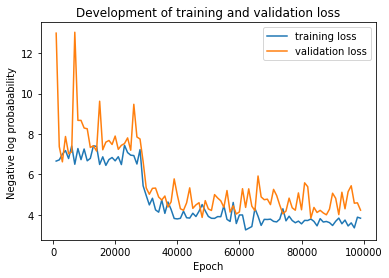

In [8]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

In [9]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results(directory, 'multivariate_polynomial_paper_setting_simple_mean', to_save)

## Simple aggregation using the max as aggregation

In [16]:
with open(os.path.join(config_dir,'1d_polynomial_compare_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False


default_conf['cnp_params']['aggregation_kwargs']['simple_aggregator_type'] = 'max'    
    
    
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

  0%|          | 0/100000 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
None
1
torch.Size([64, 50, 1])
1
torch.Size([64, 50, 1])
torch.Size([128, 1])


AttributeError: 'torch.return_types.max' object has no attribute 'unsqueeze'

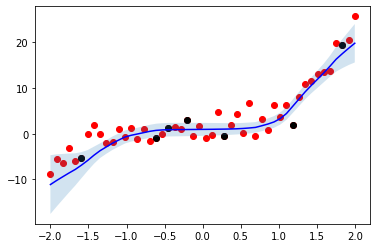

7.093549728393555


In [9]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

In [38]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results(directory, '1d_polynomial_paper_setting_simple_sum', to_save)

## Simple aggregation using the sum operation  as aggregation

  0%|          | 0/100000 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
None
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
Mean training loss at epoch 0 :                         124717.508
torch.Size([35, 1])
Mean Validation loss after 0 equals                     37158.93

Validation loss for the function plotted:                 37158.93


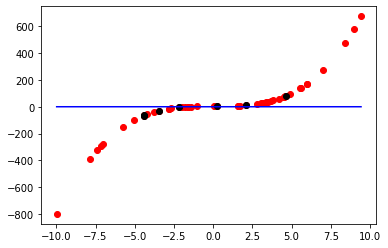

  0%|          | 12/100000 [00:00<5:16:46,  5.26it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 31/100000 [00:00<2:45:51, 10.05it/s]

torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([6

  0%|          | 51/100000 [00:00<1:29:56, 18.52it/s]


torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([576, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Siz

  0%|          | 71/100000 [00:01<52:47, 31.54it/s]  

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 91/100000 [00:01<35:35, 46.78it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size

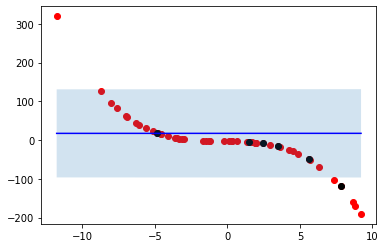

  0%|          | 110/100000 [00:01<33:03, 50.37it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 128/100000 [00:01<25:48, 64.50it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 137/100000 [00:02<28:07, 59.18it/s]

torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])


  0%|          | 152/100000 [00:02<28:28, 58.45it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])


  0%|          | 166/100000 [00:02<28:49, 57.72it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])


  0%|          | 182/100000 [00:02<25:38, 64.89it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([576, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 191/100000 [00:02<23:53, 69.64it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([576, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size

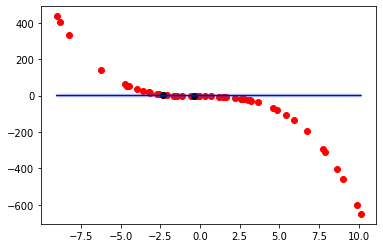

  0%|          | 221/100000 [00:03<24:59, 66.54it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 229/100000 [00:03<23:45, 70.00it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 250/100000 [00:03<20:15, 82.08it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 272/100000 [00:03<18:10, 91.41it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 293/100000 [00:04<18:20, 90.64it/s]

torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size

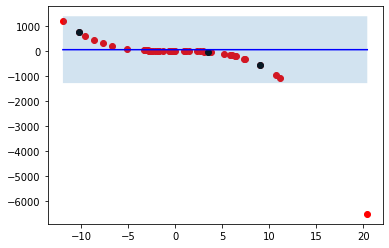

  0%|          | 313/100000 [00:04<25:15, 65.76it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 331/100000 [00:04<22:23, 74.20it/s]

torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 354/100000 [00:04<18:35, 89.32it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 376/100000 [00:05<17:03, 97.32it/s]

torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 398/100000 [00:05<16:49, 98.71it/s]

torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size

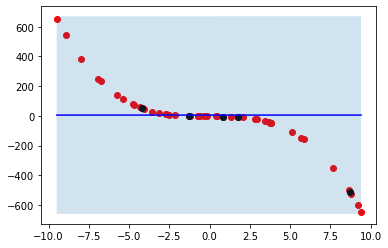

  0%|          | 420/100000 [00:05<21:57, 75.57it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 442/100000 [00:06<18:49, 88.12it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([576, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 466/100000 [00:06<16:45, 98.95it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([576, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 477/100000 [00:06<17:13, 96.31it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size

  0%|          | 499/100000 [00:06<16:42, 99.28it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
Mean training loss at epoch 500 : 

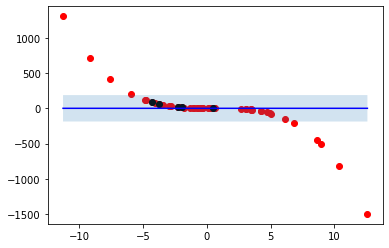

  1%|          | 522/100000 [00:06<20:59, 79.01it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 545/100000 [00:07<17:42, 93.64it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 556/100000 [00:07<17:19, 95.64it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 578/100000 [00:07<16:39, 99.47it/s]

torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 600/100000 [00:07<16:31, 100.26it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
Mean training loss at epoch 600 :                         6.496
torch.Size([45, 1])
Mean Validation los

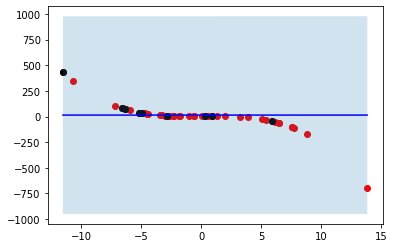

  1%|          | 611/100000 [00:08<26:10, 63.30it/s] 

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 629/100000 [00:08<22:54, 72.32it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 648/100000 [00:08<20:40, 80.12it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([576, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 668/100000 [00:08<20:45, 79.78it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])


  1%|          | 688/100000 [00:08<19:39, 84.18it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([576, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 698/100000 [00:09<19:00, 87.06it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
Mean training loss at epoch 700 :                         7.443
torch.Size([35, 1])
Mean Validation loss after 700 equals                     7.269

Validation loss for the

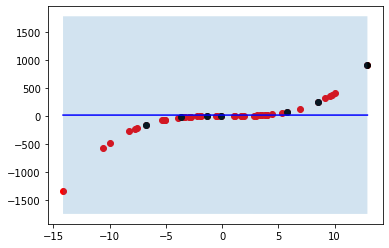

  1%|          | 708/100000 [00:09<30:07, 54.94it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([576, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 723/100000 [00:09<28:23, 58.29it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])


  1%|          | 738/100000 [00:09<29:49, 55.46it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])


  1%|          | 746/100000 [00:09<27:45, 59.58it/s]

torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])


  1%|          | 759/100000 [00:10<31:34, 52.39it/s]

torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])


  1%|          | 777/100000 [00:10<25:45, 64.19it/s]

torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([576, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([448, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size

  1%|          | 796/100000 [00:10<22:03, 74.94it/s]

torch.Size([64, 50, 1])
torch.Size([320, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([512, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([192, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([128, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([384, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size([256, 1])
torch.Size([64, 50, 1])
torch.Size([64, 50, 1])
torch.Size

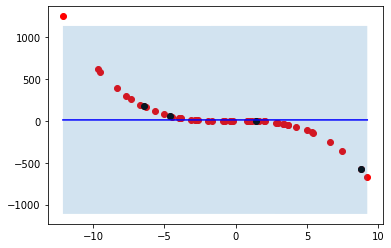

  1%|          | 801/100000 [00:10<22:34, 73.25it/s]


KeyboardInterrupt: 

In [13]:
with open(os.path.join(config_dir,'1d_polynomial_compare_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False


default_conf['cnp_params']['aggregation_kwargs']['simple_aggregator_type'] = 'sum'    
    
    
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

In [11]:
torch.from_numpy(
            np.random.rand(64, 4 * 3, 1),d)

tensor([[[7.9436e-01],
         [3.6594e-01],
         [8.4121e-01],
         [1.4722e-01],
         [6.4939e-01],
         [7.4191e-01],
         [2.5715e-01],
         [5.8786e-01],
         [5.4713e-01],
         [3.4016e-01],
         [1.4250e-01],
         [6.0306e-01]],

        [[9.7779e-01],
         [3.5256e-01],
         [6.3830e-01],
         [2.8637e-01],
         [5.6761e-01],
         [9.5166e-01],
         [5.7443e-02],
         [5.5721e-01],
         [6.1298e-01],
         [3.2428e-01],
         [3.7792e-02],
         [7.9349e-01]],

        [[5.8874e-01],
         [4.0066e-01],
         [3.0929e-01],
         [3.5649e-01],
         [6.5353e-01],
         [4.3834e-01],
         [7.9219e-01],
         [6.7270e-01],
         [3.5426e-01],
         [5.0705e-01],
         [2.6545e-01],
         [1.1756e-01]],

        [[7.6378e-01],
         [5.7094e-01],
         [8.4841e-01],
         [6.3334e-01],
         [1.7959e-01],
         [9.0344e-01],
         [5.9470e-03],
     

In [14]:
torch.rand((64, 4 * 3, 1),dtype=torch.float64)

tensor([[[0.0374],
         [0.0854],
         [0.2178],
         [0.6604],
         [0.1558],
         [0.2826],
         [0.4924],
         [0.9951],
         [0.6838],
         [0.9983],
         [0.6604],
         [0.7350]],

        [[0.7873],
         [0.6823],
         [0.0323],
         [0.5636],
         [0.4414],
         [0.6668],
         [0.2529],
         [0.4492],
         [0.0205],
         [0.6720],
         [0.5171],
         [0.7526]],

        [[0.9046],
         [0.5706],
         [0.2876],
         [0.0184],
         [0.5231],
         [0.1418],
         [0.5809],
         [0.5110],
         [0.5110],
         [0.4545],
         [0.8152],
         [0.2469]],

        [[0.8671],
         [0.5424],
         [0.4746],
         [0.7600],
         [0.7537],
         [0.0841],
         [0.7187],
         [0.0684],
         [0.5024],
         [0.1897],
         [0.1648],
         [0.7930]],

        [[0.8827],
         [0.2368],
         [0.1666],
         [0.8586],
    